## Práctica de Clasificación Lineal: Regresión Logística

En esta práctica utilizaremos el dataset MNIST, compuesto por 40000 imágenes (de 28x28 pixeles) correspondientes a distintas versiones digitalizadas de los dígitos 0, ..., 9. 

El objetivo es clasificar correctamente cada una de las imágenes, utilizando el valor de los 784 pixeles. La información está disponible en el fichero 'train.csv'; la primera columna es la etiqueta del dígito (de 0 a 9) y el resto de columnas son los valores de los pixeles.  

In [1]:
train <- read.csv('train.csv')

In [2]:
#Separamos la etiqueta, la "y", del resto de columnas "x"
# Clase (dígito del 0 al 9 a predecir)
y <- train[,1]; 
# 784 columnas con los datos de los pixeles
x <- train[,-1]

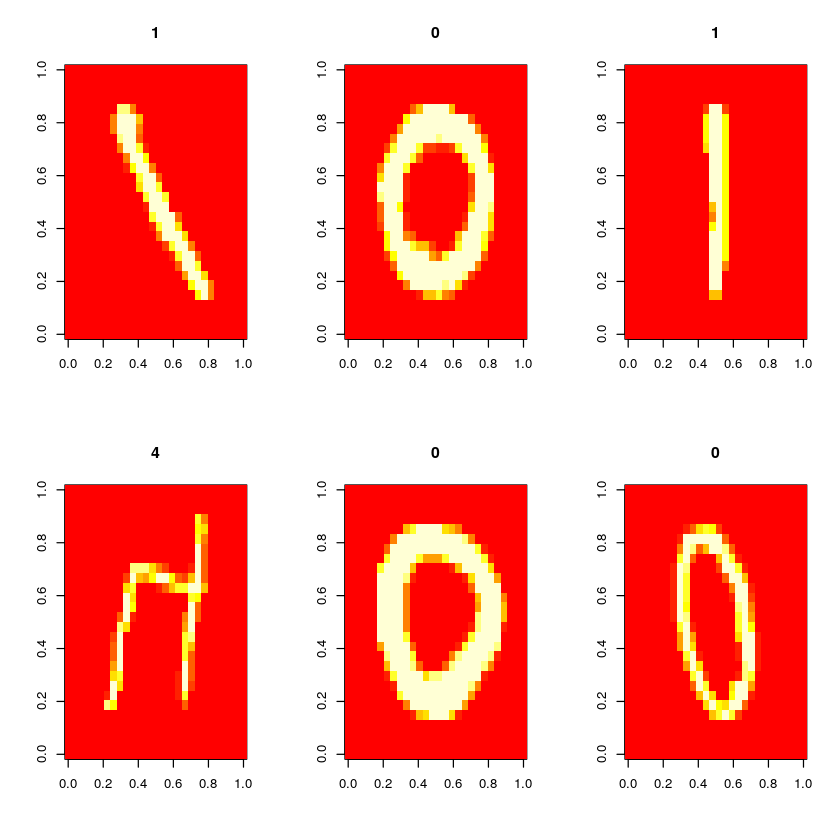

In [3]:
# Dibujamos los 6 primeros dígitos de la base de datos
par(mfrow = c(2,3))
for (i in 1:6) {
    image(matrix(as.matrix(x[i,1:784]), nrow = 28, ncol = 28))
    title(y[i])
}

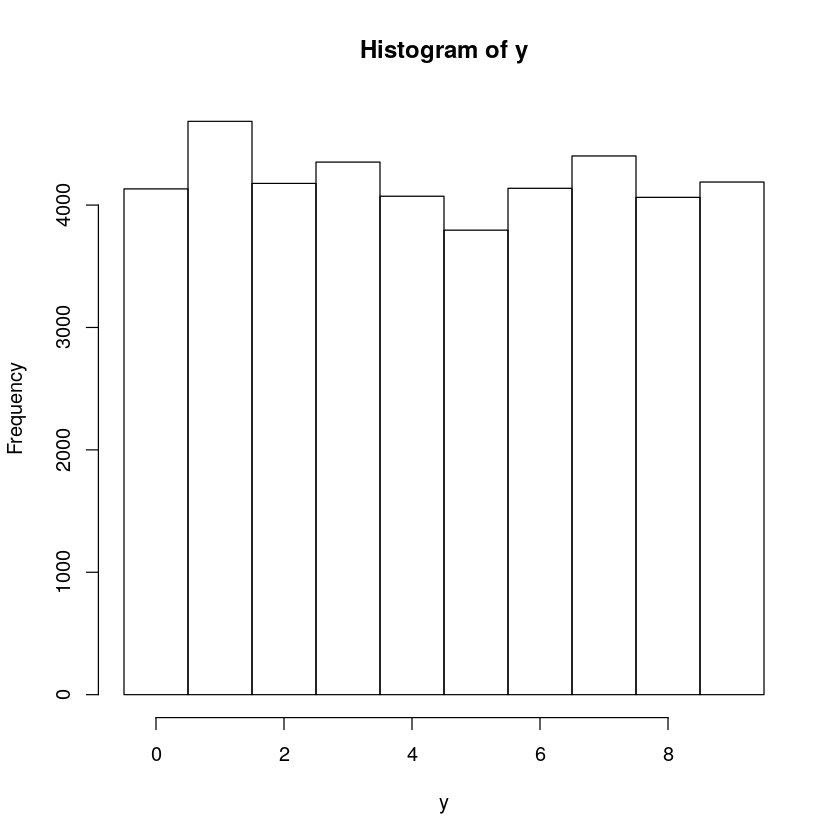

In [4]:
# Cada dígito está igualmente representado en la muestra
hist(y,breaks = -0.5:9.5)

In [5]:
# Seleccionamos un dígito concreto para tratar de predecirlo. Por ejemplo el nueve
# y9 = 1 si el dígito es 9 y 0 en caso contrario
y9 <- y;
y9[which(y != 9)] <- 0 ; y9[which(y == 9)] <- 1

In [6]:
# Construimos un dataframe para entrenar el modelo
dat <- data.frame(y9,x)

In [7]:
i<- 1:5000;
#Random sampling
#i<-sample(1:dim(x)[1],5000);
datT <- dat[i,];
datt<- dat[-i,];

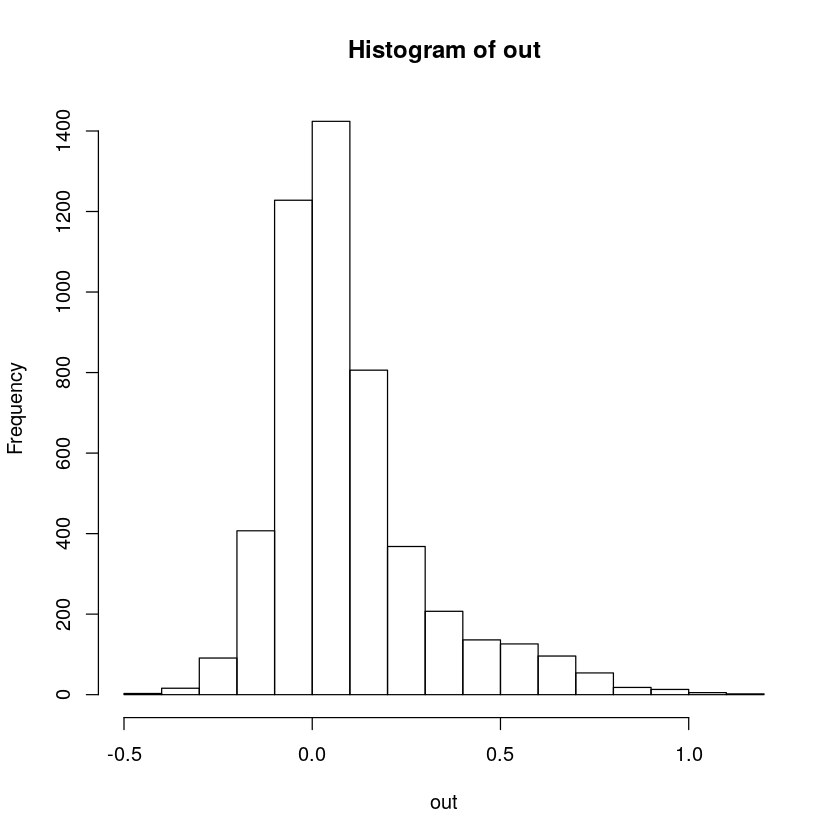

In [9]:
# Entrenamos primero un modelo lineal
model <- lm(y9~., data = datT)
out <- model$fitted.values
# El histograma muestra valores predichos (incluyendo negativos y mayores que 1)
hist(out)

In [10]:
# Hacemos binaria la salida considerando el umbral 0.5 (a modo de probabilidad)
outbin <- as.double(out > 0.5)
# Tasa de acierto (en entrenamiento)
100*sum(diag(table(datT[,1], outbin))) / length(outbin)

[1] 95.08

In [11]:
# Tasa de acierto de test
out1<- predict(object=model, newdata = datt);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)


Warning message in predict.lm(object = model, newdata = datt):
“prediction from a rank-deficient fit may be misleading”

[1] 93.56757

In [12]:
model1 <- glm(y9~., data = datT, family = binomial(link = "logit"))


# Problemas de convergencia con tantas variables
# Coefficients: (138 not defined because of singularities)
# Tasa de acierto (Train)
out2 <- model1$fitted.values
outbin2 <- as.double(out2 > 0.5)
100*sum(diag(table(datT[,1], outbin2))) / length(outbin2)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 96.52

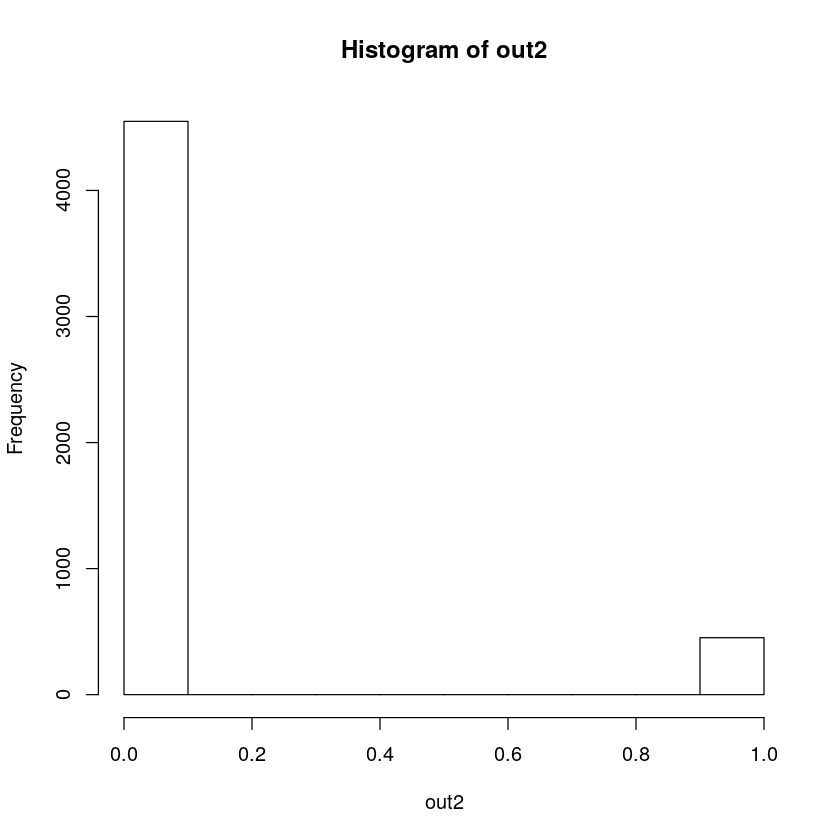

In [14]:
hist(out2)

In [15]:
# Tasa de acierto (test)
out3<- predict(object=model1, newdata = datt);
outbin3 <- as.double(out3 > 0.5)
100*sum(diag(table(datt[,1], outbin3))) / length(outbin3)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] 92.38919

In [16]:
summary(model1)


Call:
glm(formula = y9 ~ ., family = binomial(link = "logit"), data = datT)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients: (138 not defined because of singularities)
              Estimate Std. Error    z value Pr(>|z|)    
(Intercept) -1.095e+15  4.425e+06 -247478829   <2e-16 ***
pixel0              NA         NA         NA       NA    
pixel1              NA         NA         NA       NA    
pixel2              NA         NA         NA       NA    
pixel3              NA         NA         NA       NA    
pixel4              NA         NA         NA       NA    
pixel5              NA         NA         NA       NA    
pixel6              NA         NA         NA       NA    
pixel7              NA         NA         NA       NA    
pixel8              NA         NA         NA       NA    
pixel9              NA         NA         NA       NA    
pixel10             NA         NA         NA       NA    
pixel11

In [17]:
#Modelo de regresión lineal
j<-seq(1,784,20)
model <- lm(y9~., data = datT[,j])
out <- model$fitted.values
outbin <- as.double(out > 0.5)
100*sum(diag(table(datT[,1], outbin))) / length(outbin)
out1<- predict(object=model, newdata = datt[,j]);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)

[1] 90.74

Warning message in predict.lm(object = model, newdata = datt[, j]):
“prediction from a rank-deficient fit may be misleading”

[1] 90.40811

In [18]:
#Regresión logística
j<-seq(1,784,20)
model <- glm(y9~., data = datT[,j], family = binomial(link = "logit"))
out <- model$fitted.values
outbin <- as.double(out > 0.5)
100*sum(diag(table(datT[,1], outbin))) / length(outbin)
out1<- predict(object=model, newdata = datt[,j]);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 92.4

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] 91.40811

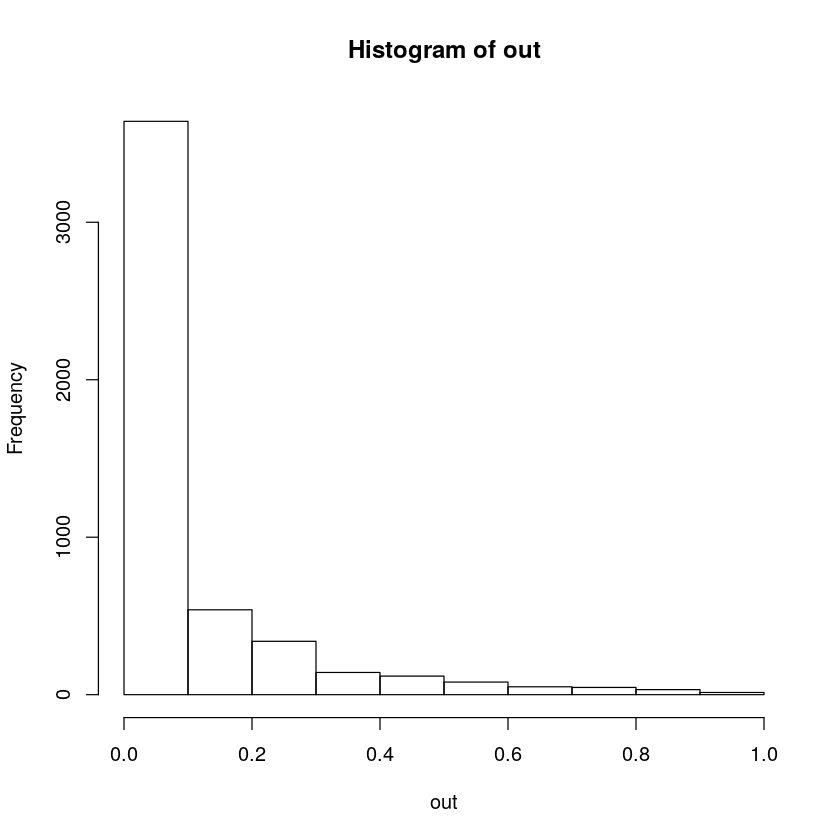

In [19]:
hist(out)

In [20]:
i<- 1:10000;
#Random sampling
#i<-sample(1:dim(x)[1],1000);
datT <- dat[i,];
datt<- dat[-i,];

j<-seq(1,784,20)
model <- glm(y9~., data = datT[,j], family = binomial(link = "logit"))
out <- model$fitted.values
outbin <- as.double(out > 0.5)
100*sum(diag(table(datT[,1], outbin))) / length(outbin)
out1<- predict(object=model, newdata = datt[,j]);
outbin1 <- as.double(out1 > 0.5)
100*sum(diag(table(datt[,1], outbin1))) / length(outbin1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

[1] 92.23

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] 91.625

In [ ]:
# Rellena

In [ ]:
# Rellena